In [271]:
# header files
%matplotlib inline
import torch
import numpy as np
import csv
import glob
import tensorboard
from PIL import Image
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]
print("Header files loaded!")

Header files loaded!


In [146]:
print(len(new_array_image_path))

3721


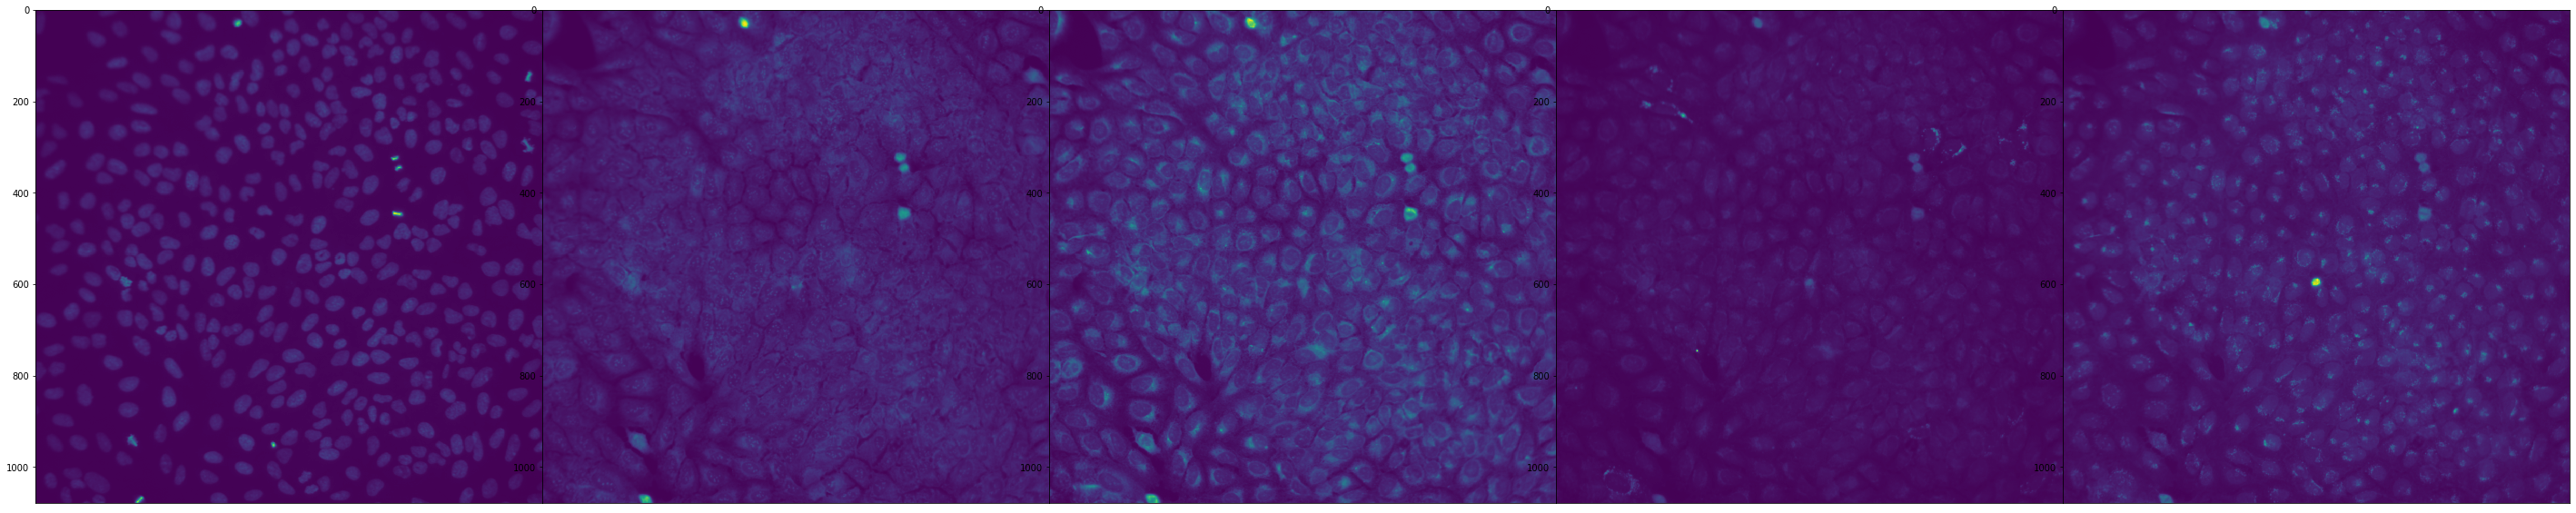

In [228]:
f, axes=plt.subplots(1,5,figsize=(50,10));
f.subplots_adjust(hspace=0,wspace=0)
for i in range(5):
    image = Image.open(new_array_image_path[i]);
    axes[i].imshow(image)
    
    
for i in range(5):
    axes[i].xaxis.set_major_locator(plt.NullLocator())
#             axarr[j,i].yaxis.set_major_locator(plt.NullLocator())
    axes[i].set_aspect('auto')


/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_16_Scope1_PE/images/NC_BIN2_1Plane/CPBroadPhenixNC1PlaneP1__2020-11-09T11_11_47-Measurement1/Images/r04c21f02p01-ch3sk1fk1fl1.tiff


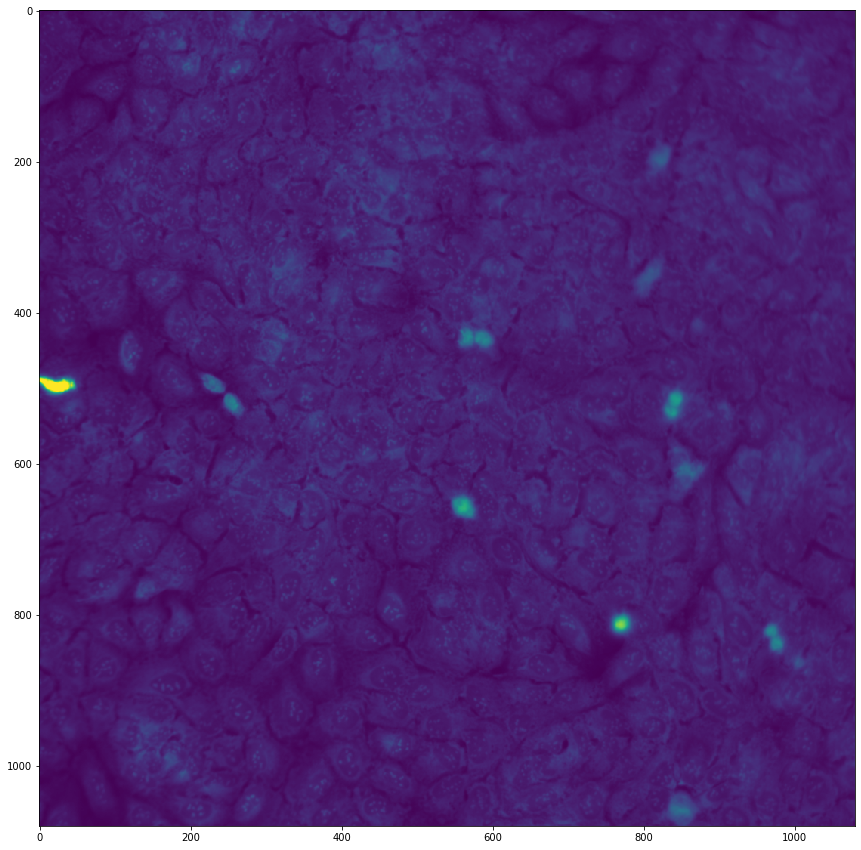

In [215]:
path = new_array_image_path[46] # index + 2 for csv
print(path)
image = Image.open(path)
plt.imshow(image)
#plt.savefig("/home/jupyter-arpit@broadinstitu-ef612/debris.png")

In [266]:
files = glob.glob("qcdata/*")
print(files)

['qcdata/Classifier_PE_NC_Bin2_Pearl.csv', 'qcdata/Classifier_20201021T092317__Pearl.csv', 'qcdata/Classifier_Nikon_10X_Batch9-Pearl.csv', 'qcdata/Classifier_Plate2-PCO-6ch-4site-10XPA_David.csv', 'qcdata/Classifier_C_BIN2__David.csv', 'qcdata/Classifier_20201020T134356__David.csv']


In [270]:
# read csv files and obtain frequency for each class
array_labels = []
array_image_path = []
array_image_debris_path = []
count_total = 0
count_good = 0
count_blurry = 0
count_empty = 0
count_debris = 0
count_debris_4channel = 0

for file in files:
    #if file == "qcdata/Classifier_Plate2-PCO-6ch-4site-10XPA_David.csv":
    #    continue
    
    
    flag = -1
    flag_good = 1
    flag_debris = -1
    flag_empty = -1
    flag_saturated = -1
    flag_blurry = -1
    flag_dead = -1
    flag_image_width = -1
    flag_image_height = -1
    flag_image_path_dna = -1
    flag_image_path_rna = -1
    flag_image_path_er = -1
    flag_image_path_mito = -1
    flag_image_path_agp = -1
    flag_image_path_golgi = -1
    flag_image_path_actin = -1
    
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                if "UserAnnotation_Blurry" in array:
                    for index in range(0, len(array)):
                        if array[index] == "UserAnnotation_Blurry":
                            flag_blurry = index
                if "UserAnnotation_Debris" in array:
                    for index in range(0, len(array)):
                        if array[index] == "UserAnnotation_Debris":
                            flag_debris = index
                if "UserAnnotation_Empty" in array:
                    for index in range(0, len(array)):
                        if array[index] == "UserAnnotation_Empty":
                            flag_empty = index
                if "UserAnnotation_Saturated" in array:
                    for index in range(0, len(array)):
                        if array[index] == "UserAnnotation_Saturated":
                            flag_saturated = index
                if "UserAnnotation_Ded" in array:
                    for index in range(0, len(array)):
                        if array[index] == "UserAnnotation_Ded":
                            flag_dead = index
                if "Image_Width_OrigDNA" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_Width_OrigDNA":
                            flag_image_width = index
                if "Image_Height_OrigDNA" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_Height_OrigDNA":
                            flag_image_height = index
                if "Image_URL_OrigDNA" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigDNA":
                            flag_image_path_dna = index
                if "Image_URL_OrigRNA" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigRNA":
                            flag_image_path_rna = index
                if "Image_URL_OrigER" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigER":
                            flag_image_path_er = index
                if "Image_URL_OrigMito" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigMito":
                            flag_image_path_mito = index
                if "Image_URL_OrigAGP" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigAGP":
                            flag_image_path_agp = index
                if "Image_URL_OrigActin" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigActin":
                            flag_image_path_actin = index
                if "Image_URL_OrigGolgi" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigGolgi":
                            flag_image_path_golgi = index
                flag = 1
            else:
                array = row
                
                # check multi-class and remove them
                check_multi_class = 0
                check = 0
                if flag_blurry != -1 and float(array[flag_blurry]) > 0:
                    check_multi_class += 1
                if flag_debris != -1 and float(array[flag_debris]) > 0:
                    check_multi_class += 1
                    check = 1
                if flag_saturated != -1 and float(array[flag_saturated]) > 0:
                    check_multi_class += 1
                if flag_empty != -1 and float(array[flag_empty]) > 0:
                    check_multi_class += 1
                if flag_dead != -1 and float(array[flag_dead]) > 0:
                    check_multi_class += 1
                if check_multi_class > 1:
                    #if flag_image_path_dna != 1 and flag_image_path_rna != -1 and flag_image_path_er != -1 and flag_image_path_mito != -1 and flag_image_path_agp != -1 and check == 1:
                    #    print("1")
                    continue
                
                check = -1
                is_saturated = -1
                label = 0
                if flag_blurry != -1 and float(array[flag_blurry]) > 0:
                    check += 1
                    label = 1
                if flag_debris != -1 and float(array[flag_debris]) > 0:
                    check += 1
                    label = 3
                if flag_saturated != -1 and float(array[flag_saturated]) > 0:
                    check += 1
                    is_saturated = 1
                if flag_empty != -1 and float(array[flag_empty]) > 0:
                    check += 1
                    label = 2
                if flag_dead != -1 and float(array[flag_dead]) > 0:
                    check += 1
                    label = 2
                    
                if is_saturated == -1 and label == 3:
                    if flag_image_path_dna != -1:
                        array_image_debris_path.append(str(array[flag_image_path_dna]))
                        count_debris += 1
                    if flag_image_path_rna != -1:
                        array_image_debris_path.append(str(array[flag_image_path_rna]))
                        count_debris += 1
                    if flag_image_path_er != -1:
                        array_image_debris_path.append(str(array[flag_image_path_er]))
                        count_debris += 1
                    if flag_image_path_mito != -1:
                        array_image_debris_path.append(str(array[flag_image_path_mito]))
                        count_debris += 1
                    if flag_image_path_agp != -1:
                        array_image_debris_path.append(str(array[flag_image_path_agp]))
                        count_debris += 1
                    if flag_image_path_actin != -1:
                        array_image_debris_path.append(str(array[flag_image_path_actin]))
                        count_debris += 1
                    if flag_image_path_golgi != -1:
                        array_image_debris_path.append(str(array[flag_image_path_golgi]))
                        count_debris += 1
                    if flag_image_path_dna != -1 and flag_image_path_er != -1 and flag_image_path_mito != -1 and flag_image_path_actin != -1:
                        count_debris_4channel += 1
                elif is_saturated == -1:
                    if flag_image_path_dna != -1:
                        array_image_path.append(str(array[flag_image_path_dna]))
                        array_labels.append(str(label))
                        
                        if label == 0:
                            count_good += 1
                        if label == 1:
                            count_blurry += 1
                        if label == 2:
                            count_empty += 1
                    if flag_image_path_rna != -1:
                        array_image_path.append(str(array[flag_image_path_rna]))
                        array_labels.append(str(label))
                        
                        if label == 0:
                            count_good += 1
                        if label == 1:
                            count_blurry += 1
                        if label == 2:
                            count_empty += 1
                    if flag_image_path_er != -1:
                        array_image_path.append(str(array[flag_image_path_er]))
                        array_labels.append(str(label))
                        
                        if label == 0:
                            count_good += 1
                        if label == 1:
                            count_blurry += 1
                        if label == 2:
                            count_empty += 1
                    if flag_image_path_mito != -1:
                        array_image_path.append(str(array[flag_image_path_mito]))
                        array_labels.append(str(label))
                        
                        if label == 0:
                            count_good += 1
                        if label == 1:
                            count_blurry += 1
                        if label == 2:
                            count_empty += 1
                    if flag_image_path_agp != -1:
                        array_image_path.append(str(array[flag_image_path_agp]))
                        array_labels.append(str(label))
                        
                        if label == 0:
                            count_good += 1
                        if label == 1:
                            count_blurry += 1
                        if label == 2:
                            count_empty += 1
                    if flag_image_path_actin != -1:
                        array_image_path.append(str(array[flag_image_path_actin]))
                        array_labels.append(str(label))
                        
                        if label == 0:
                            count_good += 1
                        if label == 1:
                            count_blurry += 1
                        if label == 2:
                            count_empty += 1
                    if flag_image_path_golgi != -1:
                        array_image_path.append(str(array[flag_image_path_golgi]))
                        array_labels.append(str(label))
                        
                        if label == 0:
                            count_good += 1
                        if label == 1:
                            count_blurry += 1
                        if label == 2:
                            count_empty += 1
                        
                    
print(count_good)
print(count_blurry)
print(count_empty)
print(count_debris)
print(count_debris_4channel)
print("Done processing!")

140074
1072
2088
3721
479
Done processing!


In [144]:
print(len(new_array_image_path))

143234


In [135]:
# write train.csv
with open('qcdata_1channel/train.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Image_Path", "Label"])
    
    for index in range(0, len(new_array_image_path)):
        spamwriter.writerow([new_array_image_path[index], array_labels[index]])

In [148]:
# write train.csv
with open('qcdata_1channel/train_debris.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Image_Path", "Label"])
    
    for index in range(0, len(new_array_image_path)):
        spamwriter.writerow([new_array_image_path[index], "0"])

In [145]:
new_array_image_path = []

for index in range(0, len(array_image_debris_path)):
    image_path = array_image_debris_path[index]
    image_path = image_path.split("\\")
    
    new_image_path = "/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots"
    flag = -1
    for path in image_path:
        if flag != -1:
            new_image_path = new_image_path + "/" + str(path)
        if path == "2019_07_11_JUMP-CP-pilots":
            flag = 1
    new_array_image_path.append(str(new_image_path))
    
print(len(new_array_image_path))

3721


In [6]:
# read csv files and obtain frequency for each class
array_labels = []
array_image_path_dna = []
array_image_path_rna = []
array_image_path_er = []
array_image_path_mito = []
array_image_path_agp = []
array_image_width = []
array_image_height = []
for file in files:
    flag = -1
    flag_good = 1
    flag_debris = -1
    flag_empty = -1
    flag_saturated = -1
    flag_blurry = -1
    flag_dead = -1
    flag_image_width = -1
    flag_image_height = -1
    flag_image_path_dna = -1
    flag_image_path_rna = -1
    flag_image_path_er = -1
    flag_image_path_mito = -1
    flag_image_path_agp = -1
    
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                if "UserAnnotation_Blurry" in array:
                    for index in range(0, len(array)):
                        if array[index] == "UserAnnotation_Blurry":
                            flag_blurry = index
                if "UserAnnotation_Debris" in array:
                    for index in range(0, len(array)):
                        if array[index] == "UserAnnotation_Debris":
                            flag_debris = index
                if "UserAnnotation_Empty" in array:
                    for index in range(0, len(array)):
                        if array[index] == "UserAnnotation_Empty":
                            flag_empty = index
                if "UserAnnotation_Saturated" in array:
                    for index in range(0, len(array)):
                        if array[index] == "UserAnnotation_Saturated":
                            flag_saturated = index
                if "UserAnnotation_Ded" in array:
                    for index in range(0, len(array)):
                        if array[index] == "UserAnnotation_Ded":
                            flag_dead = index
                if "Image_Width_OrigDNA" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_Width_OrigDNA":
                            flag_image_width = index
                if "Image_Height_OrigDNA" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_Height_OrigDNA":
                            flag_image_height = index
                if "Image_URL_OrigDNA" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigDNA":
                            flag_image_path_dna = index
                if "Image_URL_OrigRNA" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigRNA":
                            flag_image_path_rna = index
                if "Image_URL_OrigER" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigER":
                            flag_image_path_er = index
                if "Image_URL_OrigMito" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigMito":
                            flag_image_path_mito = index
                if "Image_URL_OrigAGP" in array:
                    for index in range(0, len(array)):
                        if array[index] == "Image_URL_OrigAGP":
                            flag_image_path_agp = index
                flag = 1
            else:
                array = row
                
                # check multi-class and remove them
                check_multi_class = 0
                if flag_blurry != -1 and float(array[flag_blurry]) > 0:
                    check_multi_class += 1
                if flag_debris != -1 and float(array[flag_debris]) > 0:
                    check_multi_class += 1
                if flag_saturated != -1 and float(array[flag_saturated]) > 0:
                    check_multi_class += 1
                if flag_empty != -1 and float(array[flag_empty]) > 0:
                    check_multi_class += 1
                if flag_dead != -1 and float(array[flag_dead]) > 0:
                    check_multi_class += 1
                if check_multi_class > 1:
                    continue
                
                check = -1
                is_saturated = -1
                label = 0
                if flag_blurry != -1 and float(array[flag_blurry]) > 0:
                    check += 1
                    label = 1
                if flag_debris != -1 and float(array[flag_debris]) > 0:
                    check += 1
                    label = 3
                if flag_saturated != -1 and float(array[flag_saturated]) > 0:
                    check += 1
                    is_saturated = 1
                if flag_empty != -1 and float(array[flag_empty]) > 0:
                    check += 1
                    label = 2
                if flag_dead != -1 and float(array[flag_dead]) > 0:
                    check += 1
                    label = 2
                    
                if is_saturated == -1:
                    array_image_width.append(str(array[flag_image_width]))
                    array_image_height.append(str(array[flag_image_height]))
                    array_image_path_dna.append(str(array[flag_image_path_dna]))
                    array_image_path_rna.append(str(array[flag_image_path_rna]))
                    array_image_path_er.append(str(array[flag_image_path_er]))
                    array_image_path_mito.append(str(array[flag_image_path_mito]))
                    array_image_path_agp.append(str(array[flag_image_path_agp]))
                    array_labels.append(str(label))
print("Done processing!")

Done processing!


In [7]:
print(len(array_image_width))
print(len(array_image_height))
print(len(array_image_path_dna))
print(len(array_image_path_rna))
print(len(array_image_path_er))
print(len(array_image_path_mito))
print(len(array_image_path_agp)) 

22643
22643
22643
22643
22643
22643
22643


In [8]:
new_array_image_path_dna = []
new_array_image_path_rna = []
new_array_image_path_er = []
new_array_image_path_mito = []
new_array_image_path_agp = []

for index in range(0, len(array_image_path_dna)):
    image_path = array_image_path_dna[index]
    image_path = image_path.split("\\")
    
    new_image_path = "/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots"
    flag = -1
    for path in image_path:
        if flag != -1:
            new_image_path = new_image_path + "/" + str(path)
    
        if path == "2019_07_11_JUMP-CP-pilots":
            flag = 1
    
    new_array_image_path_dna.append(str(new_image_path))


for index in range(0, len(array_image_path_rna)):
    image_path = array_image_path_rna[index]
    image_path = image_path.split("\\")
    
    new_image_path = "/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots"
    flag = -1
    for path in image_path:
        if flag != -1:
            new_image_path = new_image_path + "/" + str(path)
    
        if path == "2019_07_11_JUMP-CP-pilots":
            flag = 1
    
    new_array_image_path_rna.append(str(new_image_path))
    
    
for index in range(0, len(array_image_path_er)):
    image_path = array_image_path_er[index]
    image_path = image_path.split("\\")
    
    new_image_path = "/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots"
    flag = -1
    for path in image_path:
        if flag != -1:
            new_image_path = new_image_path + "/" + str(path)
    
        if path == "2019_07_11_JUMP-CP-pilots":
            flag = 1
    
    new_array_image_path_er.append(str(new_image_path))
    
    
for index in range(0, len(array_image_path_mito)):
    image_path = array_image_path_mito[index]
    image_path = image_path.split("\\")
    
    new_image_path = "/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots"
    flag = -1
    for path in image_path:
        if flag != -1:
            new_image_path = new_image_path + "/" + str(path)
    
        if path == "2019_07_11_JUMP-CP-pilots":
            flag = 1
    
    new_array_image_path_mito.append(str(new_image_path))
    

for index in range(0, len(array_image_path_agp)):
    image_path = array_image_path_agp[index]
    image_path = image_path.split("\\")
    
    new_image_path = "/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots"
    flag = -1
    for path in image_path:
        if flag != -1:
            new_image_path = new_image_path + "/" + str(path)
    
        if path == "2019_07_11_JUMP-CP-pilots":
            flag = 1
    
    new_array_image_path_agp.append(str(new_image_path))
    
    
print(len(new_array_image_path_agp))
print(len(new_array_image_path_mito))
print(len(new_array_image_path_er))
print(len(new_array_image_path_rna))
print(len(new_array_image_path_dna))

22643
22643
22643
22643
22643


In [9]:
print(array_image_width[:5])
print(array_image_height[:5])
print(new_array_image_path_dna[:5])
print(new_array_image_path_rna[:5])
print(new_array_image_path_er[:5])
print(new_array_image_path_mito[:5])
print(new_array_image_path_agp[:5])
print(array_labels[:5])

['1080', '1080', '1080', '1080', '1080']
['1080', '1080', '1080', '1080', '1080']
['/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_16_Scope1_PE/images/NC_BIN2_1Plane/CPBroadPhenixNC1PlaneP1__2020-11-09T11_11_47-Measurement1/Images/r01c01f01p01-ch1sk1fk1fl1.tiff', '/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_16_Scope1_PE/images/NC_BIN2_1Plane/CPBroadPhenixNC1PlaneP1__2020-11-09T11_11_47-Measurement1/Images/r01c01f02p01-ch1sk1fk1fl1.tiff', '/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_16_Scope1_PE/images/NC_BIN2_1Plane/CPBroadPhenixNC1PlaneP1__2020-11-09T11_11_47-Measurement1/Images/r01c01f03p01-ch1sk1fk1fl1.tiff', '/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_16_Scope1_PE/images/NC_BIN2_1Plane/CPBroadPhenixNC1PlaneP1__2020-11-09T11_11_47-Measurement1/Images/r01c02f01p01-ch1sk1fk1fl1.tiff', '/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_16_Scope1_PE/images/NC_BIN2_1Plane/CPBroadPhenixNC

In [10]:
# write train.csv
with open('data_5channel/train.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Image_Path_DNA", "Image_Path_RNA", "Image_Path_ER", "Image_Path_Mito", "Image_Path_AGP", "Label", "Image_Width", "Image_Height"])
    
    for index in range(0, len(array_image_width)):
        spamwriter.writerow([new_array_image_path_dna[index], new_array_image_path_rna[index], new_array_image_path_er[index], new_array_image_path_mito[index], new_array_image_path_agp[index], array_labels[index], array_image_width[index], array_image_height[index]])

In [ ]:
# generate train.csv and val.csv
files = glob.glob("qcdata_1channel/*")
image_path_label_0 = []
labels_0 = []
image_path_label_1 = []
labels_1 = []
image_path_label_2 = []
labels_2 = []
image_path_label_3 = []
labels_3 = []

for file in files:
    flag = -1
    
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                flag = 1
            else:
                array = row
                
                if file == "qcdata_1channel/train_debris.csv":
                    array[1] = "3"
                
                if int(array[1]) == 2:
                    image_path_label_2.append(str(array[0]))
                    labels_2.append(str(array[1]))
                    
                if int(array[1]) == 3:
                    image_path_label_3.append(str(array[0]))
                    labels_3.append(str(array[1]))
                    
                if int(array[1]) == 0:
                    image_path_label_0.append(str(array[0]))
                    labels_0.append(str(array[1]))
                    
                if int(array[1]) == 1:
                    image_path_label_1.append(str(array[0]))
                    labels_1.append(str(array[1]))
                    
print(len(labels_0))
print(len(labels_1))
print(len(labels_2))
print(len(labels_3))

In [256]:
s = "arpit_ppp"
s.find("1")

-1

In [257]:
# generate train.csv and val.csv
train_label_0 = []
train_label_1 = []
train_label_2 = []
train_label_3 = []

val_label_0 = []
val_label_1 = []
val_label_2 = []
val_label_3 = []

files = glob.glob("qcdata_1channel/*")
image_path_label_0 = []
labels_0 = []
image_path_label_1 = []
labels_1 = []
image_path_label_2 = []
labels_2 = []
image_path_label_3 = []
labels_3 = []

for file in files:
    flag = -1
    
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                flag = 1
            else:
                array = row
                
                if str(array[0]).find(".nd2") != -1:
                    continue
                
                if file == "qcdata_1channel/train_debris.csv":
                    array[1] = "3"
                
                if int(array[1]) == 2:
                    image_path_label_2.append(str(array[0]))
                    labels_2.append(str(array[1]))
                    
                if int(array[1]) == 3:
                    image_path_label_3.append(str(array[0]))
                    labels_3.append(str(array[1]))
                    
                if int(array[1]) == 0:
                    image_path_label_0.append(str(array[0]))
                    labels_0.append(str(array[1]))
                    
                if int(array[1]) == 1:
                    image_path_label_1.append(str(array[0]))
                    labels_1.append(str(array[1]))
                    
print(len(labels_0))
print(len(labels_1))
print(len(labels_2))
print(len(labels_3))

134678
600
2012
3549


In [258]:
# for good class
n = 200
index = np.random.choice(len(image_path_label_0), n, replace=False)

for index1 in range(0, len(index)):
    val_label_0.append(image_path_label_0[index[index1]])

index_train = []
for index1 in range(0, len(labels_0)):
    flag = -1
    for index2 in range(0, len(index)):
        if index[index2] == index1:
            flag = 1
            break
    if flag == -1:
        index_train.append(index1)
        

for index1 in range(0, len(index_train)):
    if index1%10 == 0:
        train_label_0.append(image_path_label_0[index_train[index1]])

print(len(train_label_0))
print(len(val_label_0))

13448
200


In [259]:
# for blurry class
n = 200
index = np.random.choice(len(image_path_label_1), n, replace=False)

for index1 in range(0, len(index)):
    val_label_1.append(image_path_label_1[index[index1]])

index_train = []
for index1 in range(0, len(labels_1)):
    flag = -1
    for index2 in range(0, len(index)):
        if index[index2] == index1:
            flag = 1
            break
    if flag == -1:
        index_train.append(index1)
        

for index1 in range(0, len(index_train)):
    train_label_1.append(image_path_label_1[index_train[index1]])

print(len(train_label_1))
print(len(val_label_1))

400
200


In [260]:
# for empty class
n = 200
index = np.random.choice(len(image_path_label_2), n, replace=False)

for index1 in range(0, len(index)):
    val_label_2.append(image_path_label_2[index[index1]])

index_train = []
for index1 in range(0, len(labels_2)):
    flag = -1
    for index2 in range(0, len(index)):
        if index[index2] == index1:
            flag = 1
            break
    if flag == -1:
        index_train.append(index1)
        

for index1 in range(0, len(index_train)):
    train_label_2.append(image_path_label_2[index_train[index1]])

print(len(train_label_2))
print(len(val_label_2))

1812
200


In [261]:
# for debris class
n = 200
index = np.random.choice(len(image_path_label_3), n, replace=False)

for index1 in range(0, len(index)):
    val_label_3.append(image_path_label_3[index[index1]])

index_train = []
for index1 in range(0, len(labels_3)):
    flag = -1
    for index2 in range(0, len(index)):
        if index[index2] == index1:
            flag = 1
            break
    if flag == -1:
        index_train.append(index1)
        

for index1 in range(0, len(index_train)):
    train_label_3.append(image_path_label_3[index_train[index1]])

print(len(train_label_3))
print(len(val_label_3))

3349
200


In [36]:
# generate train.csv and val.csv
train_dna_label_0 = []
train_rna_label_0 = []
train_er_label_0 = []
train_mito_label_0 = []
train_agp_label_0 = []
train_dna_label_2 = []
train_rna_label_2 = []
train_er_label_2 = []
train_mito_label_2 = []
train_agp_label_2 = []
train_dna_label_3 = []
train_rna_label_3 = []
train_er_label_3 = []
train_mito_label_3 = []
train_agp_label_3 = []

val_dna_label_0 = []
val_rna_label_0 = []
val_er_label_0 = []
val_mito_label_0 = []
val_agp_label_0 = []
val_dna_label_2 = []
val_rna_label_2 = []
val_er_label_2 = []
val_mito_label_2 = []
val_agp_label_2 = []
val_dna_label_3 = []
val_rna_label_3 = []
val_er_label_3 = []
val_mito_label_3 = []
val_agp_label_3 = []

files = glob.glob("qcdata_5channel/*")
image_path_dna_label_0 = []
image_path_rna_label_0 = []
image_path_er_label_0 = []
image_path_mito_label_0 = []
image_path_agp_label_0 = []
labels_0 = []
image_path_dna_label_2 = []
image_path_rna_label_2 = []
image_path_er_label_2 = []
image_path_mito_label_2 = []
image_path_agp_label_2 = []
labels_2 = []
image_path_dna_label_3 = []
image_path_rna_label_3 = []
image_path_er_label_3 = []
image_path_mito_label_3 = []
image_path_agp_label_3 = []
labels_3 = []

for file in files:
    flag = -1
    
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                flag = 1
            else:
                array = row
                
                if int(array[5]) == 1 or int(array[5]) == 2:
                    image_path_dna_label_2.append(str(array[0]))
                    image_path_rna_label_2.append(str(array[1]))
                    image_path_er_label_2.append(str(array[2]))
                    image_path_mito_label_2.append(str(array[3]))
                    image_path_agp_label_2.append(str(array[4]))
                    labels_2.append(str(array[5]))
                    
                if int(array[5]) == 1 or int(array[5]) == 3:
                    image_path_dna_label_3.append(str(array[0]))
                    image_path_rna_label_3.append(str(array[1]))
                    image_path_er_label_3.append(str(array[2]))
                    image_path_mito_label_3.append(str(array[3]))
                    image_path_agp_label_3.append(str(array[4]))
                    labels_3.append(str(array[5]))
                    
                if int(array[5]) == 1 or int(array[5]) == 0:
                    image_path_dna_label_0.append(str(array[0]))
                    image_path_rna_label_0.append(str(array[1]))
                    image_path_er_label_0.append(str(array[2]))
                    image_path_mito_label_0.append(str(array[3]))
                    image_path_agp_label_0.append(str(array[4]))
                    labels_0.append(str(array[5]))
                    
print(len(labels_0))
print(len(labels_2))
print(len(labels_3))

22156
1760
675


In [42]:
# for good class
n = 200
index = np.random.choice(len(image_path_dna_label_0), n, replace=False)

for index1 in range(0, len(index)):
    val_dna_label_0.append(image_path_dna_label_0[index[index1]])
    val_rna_label_0.append(image_path_rna_label_0[index[index1]])
    val_er_label_0.append(image_path_er_label_0[index[index1]])
    val_mito_label_0.append(image_path_mito_label_0[index[index1]])
    val_agp_label_0.append(image_path_agp_label_0[index[index1]])


index_train = []
for index1 in range(0, len(labels_0)):
    flag = -1
    for index2 in range(0, len(index)):
        if index[index2] == index1:
            flag = 1
            break
    if flag == -1:
        index_train.append(index1)
        

for index1 in range(0, len(index_train)):
    train_dna_label_0.append(image_path_dna_label_0[index_train[index1]])
    train_rna_label_0.append(image_path_rna_label_0[index_train[index1]])
    train_er_label_0.append(image_path_er_label_0[index_train[index1]])
    train_mito_label_0.append(image_path_mito_label_0[index_train[index1]])
    train_agp_label_0.append(image_path_agp_label_0[index_train[index1]])

print(len(train_dna_label_0))
print(len(val_dna_label_0))

21956
200


In [43]:
# for empty class
n = 200
index = np.random.choice(len(image_path_dna_label_2), n, replace=False)

for index1 in range(0, len(index)):
    val_dna_label_2.append(image_path_dna_label_2[index[index1]])
    val_rna_label_2.append(image_path_rna_label_2[index[index1]])
    val_er_label_2.append(image_path_er_label_2[index[index1]])
    val_mito_label_2.append(image_path_mito_label_2[index[index1]])
    val_agp_label_2.append(image_path_agp_label_2[index[index1]])


index_train = []
for index1 in range(0, len(labels_2)):
    flag = -1
    for index2 in range(0, len(index)):
        if index[index2] == index1:
            flag = 1
            break
    if flag == -1:
        index_train.append(index1)
        

for index1 in range(0, len(index_train)):
    train_dna_label_2.append(image_path_dna_label_2[index_train[index1]])
    train_rna_label_2.append(image_path_rna_label_2[index_train[index1]])
    train_er_label_2.append(image_path_er_label_2[index_train[index1]])
    train_mito_label_2.append(image_path_mito_label_2[index_train[index1]])
    train_agp_label_2.append(image_path_agp_label_2[index_train[index1]])

print(len(train_dna_label_2))
print(len(val_dna_label_2))

1560
200


In [44]:
# for empty class
n = 200
index = np.random.choice(len(image_path_dna_label_3), n, replace=False)

for index1 in range(0, len(index)):
    val_dna_label_3.append(image_path_dna_label_3[index[index1]])
    val_rna_label_3.append(image_path_rna_label_3[index[index1]])
    val_er_label_3.append(image_path_er_label_3[index[index1]])
    val_mito_label_3.append(image_path_mito_label_3[index[index1]])
    val_agp_label_3.append(image_path_agp_label_3[index[index1]])


index_train = []
for index1 in range(0, len(labels_3)):
    flag = -1
    for index2 in range(0, len(index)):
        if index[index2] == index1:
            flag = 1
            break
    if flag == -1:
        index_train.append(index1)
        

for index1 in range(0, len(index_train)):
    train_dna_label_3.append(image_path_dna_label_3[index_train[index1]])
    train_rna_label_3.append(image_path_rna_label_3[index_train[index1]])
    train_er_label_3.append(image_path_er_label_3[index_train[index1]])
    train_mito_label_3.append(image_path_mito_label_3[index_train[index1]])
    train_agp_label_3.append(image_path_agp_label_3[index_train[index1]])

print(len(train_dna_label_3))
print(len(val_dna_label_3))

475
200


In [47]:
train_dna = []
train_rna = []
train_er = []
train_mito = []
train_agp = []
train_labels = []

for index in range(0, len(train_dna_label_0)):
    train_dna.append(train_dna_label_0[index])
    train_rna.append(train_rna_label_0[index])
    train_er.append(train_er_label_0[index])
    train_mito.append(train_mito_label_0[index])
    train_agp.append(train_agp_label_0[index])
    train_labels.append("0")
    
for index in range(0, len(train_dna_label_2)):
    train_dna.append(train_dna_label_2[index])
    train_rna.append(train_rna_label_2[index])
    train_er.append(train_er_label_2[index])
    train_mito.append(train_mito_label_2[index])
    train_agp.append(train_agp_label_2[index])
    train_labels.append("2")
    
for index in range(0, len(train_dna_label_3)):
    train_dna.append(train_dna_label_3[index])
    train_rna.append(train_rna_label_3[index])
    train_er.append(train_er_label_3[index])
    train_mito.append(train_mito_label_3[index])
    train_agp.append(train_agp_label_3[index])
    train_labels.append("3")
    

print(len(train_dna))
print(len(train_rna))
print(len(train_er))
print(len(train_mito))
print(len(train_agp))
print(len(train_labels))

23991
23991
23991
23991
23991
23991


In [48]:
# write final_train.csv
with open('qcdata_5channel/final_train.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Image_Path_DNA", "Image_Path_RNA", "Image_Path_ER", "Image_Path_Mito", "Image_Path_AGP", "Label"])
    
    for index in range(0, len(train_dna)):
        spamwriter.writerow([train_dna[index], train_rna[index], train_er[index], train_mito[index], train_agp[index], train_labels[index]])

In [262]:
train_path = []
train_labels = []

for index in range(0, len(train_label_0)):
    train_path.append(train_label_0[index])
    train_labels.append("0")

for index in range(0, len(train_label_1)):
    train_path.append(train_label_1[index])
    train_labels.append("1")    

for index in range(0, len(train_label_2)):
    train_path.append(train_label_2[index])
    train_labels.append("2")
    
for index in range(0, len(train_label_3)):
    train_path.append(train_label_3[index])
    train_labels.append("3")
    

print(len(train_path))
print(len(train_labels))

19009
19009


In [263]:
# write final_train.csv
with open('qcdata_1channel/final_train.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Image_Path", "Label"])
    
    for index in range(0, len(train_path)):
        spamwriter.writerow([train_path[index], train_labels[index]])

In [264]:
val_path = []
val_labels = []

for index in range(0, len(val_label_0)):
    val_path.append(val_label_0[index])
    val_labels.append("0")
    
for index in range(0, len(val_label_1)):
    val_path.append(val_label_1[index])
    val_labels.append("1")
    
for index in range(0, len(val_label_2)):
    val_path.append(val_label_2[index])
    val_labels.append("2")
    
for index in range(0, len(val_label_3)):
    val_path.append(val_label_3[index])
    val_labels.append("3")
    

print(len(val_path))
print(len(val_labels))

800
800


In [265]:
# write final_train.csv
with open('qcdata_1channel/final_val.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Image_Path", "Label"])
    
    for index in range(0, len(val_path)):
        spamwriter.writerow([val_path[index], val_labels[index]])

In [20]:
# generate more data augmentation samples
files = glob.glob("qcdata_5channel/*")
image_path_dna = []
image_path_rna = []
image_path_er = []
image_path_mito = []
image_path_agp = []
labels = []
for file in files:
    flag = -1
    
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                flag = 1
            else:
                array = row
                image_path_dna.append(str(array[0]))
                image_path_rna.append(str(array[1]))
                image_path_er.append(str(array[2]))
                image_path_mito.append(str(array[3]))
                image_path_agp.append(str(array[4]))
                labels.append(str(array[5]))
                
                #if int(array[5]) == 1 or int(array[5]) == 2:
                #    image_path_dna.append(str(array[0]))
                #    image_path_rna.append(str(array[1]))
                #    image_path_er.append(str(array[2]))
                #    image_path_mito.append(str(array[3]))
                #    image_path_agp.append(str(array[4]))
                #    labels.append(str(array[5]))
                    
print(len(image_path_dna))
print(len(image_path_rna))
print(len(image_path_er))
print(len(image_path_mito))
print(len(image_path_agp))
print(len(labels))

24591
24591
24591
24591
24591
24591


In [19]:
# write train.csv
with open('train.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Image_Path_DNA", "Image_Path_RNA", "Image_Path_ER", "Image_Path_Mito", "Image_Path_AGP", "Label"])
    
    for index in range(0, len(image_path_dna)):
        spamwriter.writerow([image_path_dna[index], image_path_rna[index], image_path_er[index], image_path_mito[index], image_path_agp[index], labels[index]])

In [ ]:
# rotate 30, 45, 90 and 180
new_dna_path = []
new_rna_path = []
new_er_path = []
new_mito_path = []
new_agp_path = []
new_labels = []
for index in range(0, len(image_path_dna)):
    dna_path = image_path_dna[index]
    rna_path = image_path_rna[index]
    er_path = image_path_er[index]
    mito_path = image_path_mito[index]
    agp_path = image_path_agp[index]
    
    # save rotated dna
    im = Image.open(dna_path)
    im_rotated30 = im.rotate(angle=30)
    im_rotated45 = im.rotate(angle=45)
    im_rotated30_ = im.rotate(angle=90)
    im_rotated45_ = im.rotate(angle=180)
    new_dna_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/dna_rotated30_" + str(index) + ".tiff")
    new_dna_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/dna_rotated45_" + str(index) + ".tiff")
    new_dna_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/dna_rotated90_" + str(index) + ".tiff")
    new_dna_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/dna_rotated180_" + str(index) + ".tiff")
    im_rotated30.save("/home/jupyter-arpit@broadinstitu-ef612/data/dna_rotated30_" + str(index) + ".tiff")
    im_rotated45.save("/home/jupyter-arpit@broadinstitu-ef612/data/dna_rotated45_" + str(index) + ".tiff")
    im_rotated30_.save("/home/jupyter-arpit@broadinstitu-ef612/data/dna_rotated90_" + str(index) + ".tiff")
    im_rotated45_.save("/home/jupyter-arpit@broadinstitu-ef612/data/dna_rotated180_" + str(index) + ".tiff")
    
    # save rotated rna
    im = Image.open(rna_path)
    im_rotated30 = im.rotate(angle=30)
    im_rotated45 = im.rotate(angle=45)
    im_rotated30_ = im.rotate(angle=90)
    im_rotated45_ = im.rotate(angle=180)
    new_rna_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/rna_rotated30_" + str(index) + ".tiff")
    new_rna_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/rna_rotated45_" + str(index) + ".tiff")
    new_rna_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/rna_rotated90_" + str(index) + ".tiff")
    new_rna_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/rna_rotated180_" + str(index) + ".tiff")
    im_rotated30.save("/home/jupyter-arpit@broadinstitu-ef612/data/rna_rotated30_" + str(index) + ".tiff")
    im_rotated45.save("/home/jupyter-arpit@broadinstitu-ef612/data/rna_rotated45_" + str(index) + ".tiff")
    im_rotated30_.save("/home/jupyter-arpit@broadinstitu-ef612/data/rna_rotated90_" + str(index) + ".tiff")
    im_rotated45_.save("/home/jupyter-arpit@broadinstitu-ef612/data/rna_rotated180_" + str(index) + ".tiff")
    
    # save rotated er
    im = Image.open(er_path)
    im_rotated30 = im.rotate(angle=30)
    im_rotated45 = im.rotate(angle=45)
    im_rotated30_ = im.rotate(angle=90)
    im_rotated45_ = im.rotate(angle=180)
    new_er_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/er_rotated30_" + str(index) + ".tiff")
    new_er_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/er_rotated45_" + str(index) + ".tiff")
    new_er_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/er_rotated90_" + str(index) + ".tiff")
    new_er_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/er_rotated180_" + str(index) + ".tiff")
    im_rotated30.save("/home/jupyter-arpit@broadinstitu-ef612/data/er_rotated30_" + str(index) + ".tiff")
    im_rotated45.save("/home/jupyter-arpit@broadinstitu-ef612/data/er_rotated45_" + str(index) + ".tiff")
    im_rotated30_.save("/home/jupyter-arpit@broadinstitu-ef612/data/er_rotated90_" + str(index) + ".tiff")
    im_rotated45_.save("/home/jupyter-arpit@broadinstitu-ef612/data/er_rotated180_" + str(index) + ".tiff")
    
    # save rotated mito
    im = Image.open(mito_path)
    im_rotated30 = im.rotate(angle=30)
    im_rotated45 = im.rotate(angle=45)
    im_rotated30_ = im.rotate(angle=90)
    im_rotated45_ = im.rotate(angle=180)
    new_mito_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/mito_rotated30_" + str(index) + ".tiff")
    new_mito_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/mito_rotated45_" + str(index) + ".tiff")
    new_mito_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/mito_rotated90_" + str(index) + ".tiff")
    new_mito_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/mito_rotated180_" + str(index) + ".tiff")
    im_rotated30.save("/home/jupyter-arpit@broadinstitu-ef612/data/mito_rotated30_" + str(index) + ".tiff")
    im_rotated45.save("/home/jupyter-arpit@broadinstitu-ef612/data/mito_rotated45_" + str(index) + ".tiff")
    im_rotated30_.save("/home/jupyter-arpit@broadinstitu-ef612/data/mito_rotated90_" + str(index) + ".tiff")
    im_rotated45_.save("/home/jupyter-arpit@broadinstitu-ef612/data/mito_rotated180_" + str(index) + ".tiff")
    
    # save rotated agp
    im = Image.open(agp_path)
    im_rotated30 = im.rotate(angle=30)
    im_rotated45 = im.rotate(angle=45)
    im_rotated30_ = im.rotate(angle=90)
    im_rotated45_ = im.rotate(angle=180)
    new_agp_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/agp_rotated30_" + str(index) + ".tiff")
    new_agp_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/agp_rotated45_" + str(index) + ".tiff")
    new_agp_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/agp_rotated90_" + str(index) + ".tiff")
    new_agp_path.append("/home/jupyter-arpit@broadinstitu-ef612/data/agp_rotated180_" + str(index) + ".tiff")
    im_rotated30.save("/home/jupyter-arpit@broadinstitu-ef612/data/agp_rotated30_" + str(index) + ".tiff")
    im_rotated45.save("/home/jupyter-arpit@broadinstitu-ef612/data/agp_rotated45_" + str(index) + ".tiff")
    im_rotated30_.save("/home/jupyter-arpit@broadinstitu-ef612/data/agp_rotated90_" + str(index) + ".tiff")
    im_rotated45_.save("/home/jupyter-arpit@broadinstitu-ef612/data/agp_rotated180_" + str(index) + ".tiff")
    
    
    # push labels
    new_labels.append(labels[index])
    new_labels.append(labels[index])
    new_labels.append(labels[index])
    new_labels.append(labels[index])

In [ ]:
# write train.csv
with open('qcdata_5channel/new_train.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(["Image_Path_DNA", "Image_Path_RNA", "Image_Path_ER", "Image_Path_Mito", "Image_Path_AGP", "Label", "Image_Width", "Image_Height"])
    
    for index in range(0, len(new_dna_path)):
        spamwriter.writerow([new_dna_path[index], new_rna_path[index], new_er_path[index], new_mito_path[index], new_agp_path[index], new_labels[index], "2000", "2000"])

In [ ]:
print(len(new_dna_path))
print(len(new_rna_path))
print(len(new_er_path))
print(len(new_mito_path))
print(len(new_agp_path))
print(len(new_labels))
print(new_dna_path[0])

In [13]:
with open('data_5channel/train.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            print(row)

['Image_Path_DNA', 'Image_Path_RNA', 'Image_Path_ER', 'Image_Path_Mito', 'Image_Path_AGP', 'Label', 'Image_Width', 'Image_Height']
['/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_16_Scope1_PE/images/NC_BIN2_1Plane/CPBroadPhenixNC1PlaneP1__2020-11-09T11_11_47-Measurement1/Images/r01c01f01p01-ch1sk1fk1fl1.tiff', '/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_16_Scope1_PE/images/NC_BIN2_1Plane/CPBroadPhenixNC1PlaneP1__2020-11-09T11_11_47-Measurement1/Images/r01c01f01p01-ch3sk1fk1fl1.tiff', '/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_16_Scope1_PE/images/NC_BIN2_1Plane/CPBroadPhenixNC1PlaneP1__2020-11-09T11_11_47-Measurement1/Images/r01c01f01p01-ch2sk1fk1fl1.tiff', '/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_16_Scope1_PE/images/NC_BIN2_1Plane/CPBroadPhenixNC1PlaneP1__2020-11-09T11_11_47-Measurement1/Images/r01c01f01p01-ch5sk1fk1fl1.tiff', '/dgx1nas1/cellpainting-datasets/2019_07_11_JUMP_CP_pilots/2020_11_1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

